A linked list of length `n` is given such that each node contains an additional random pointer, which could point to any node in the list, or `null`.

Construct a [deep copy](https://en.wikipedia.org/wiki/Object_copying#Deep_copy) of the list. The deep copy should consist of exactly `n` **brand new** nodes, where each new node has its value set to the value of its corresponding original node. Both the `next` and `random` pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. **None of the pointers in the new list should point to nodes in the original list**.

For example, if there are two nodes `X` and `Y` in the original list, where `X.random --> Y`, then for the corresponding two nodes `x` and `y` in the copied list, `x.random --> y`.

Return *the head of the copied linked list*.

The linked list is represented in the input/output as a list of `n` nodes. Each node is represented as a pair of `[val, random_index]` where:
- `val`: an integer representing `Node.val`
- `random_index`: the index of the node (range from `0` to `n-1`) that the `random` pointer points to, or `null` if it does not point to any node.

Your code will **only** be given the `head` of the original linked list.

<br>

**Example 1:**

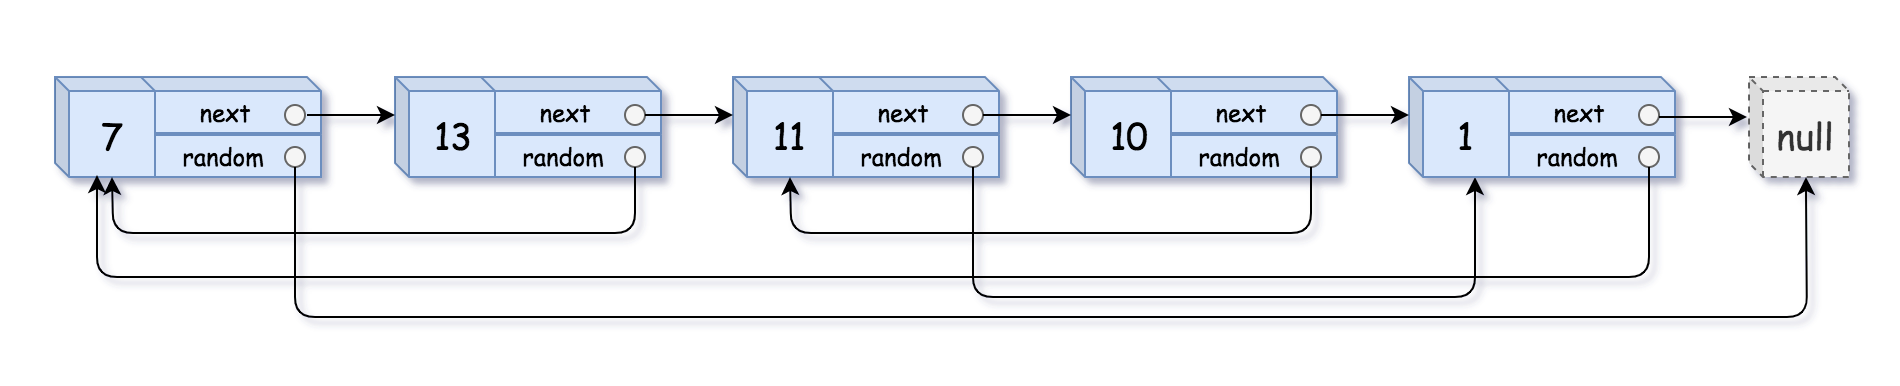

>**Input:** head = [[7,null],[13,0],[11,4],[10,2],[1,0]]<br>
>**Output:** [[7,null],[13,0],[11,4],[10,2],[1,0]]

**Example 2:**

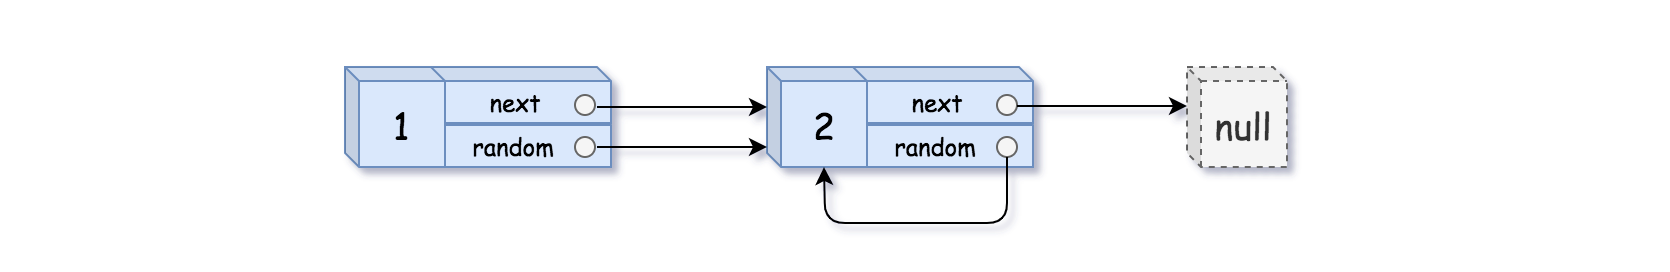

>**Input:** head = [[1,1],[2,1]]<br>
>**Output:** [[1,1],[2,1]]

**Example 3:**

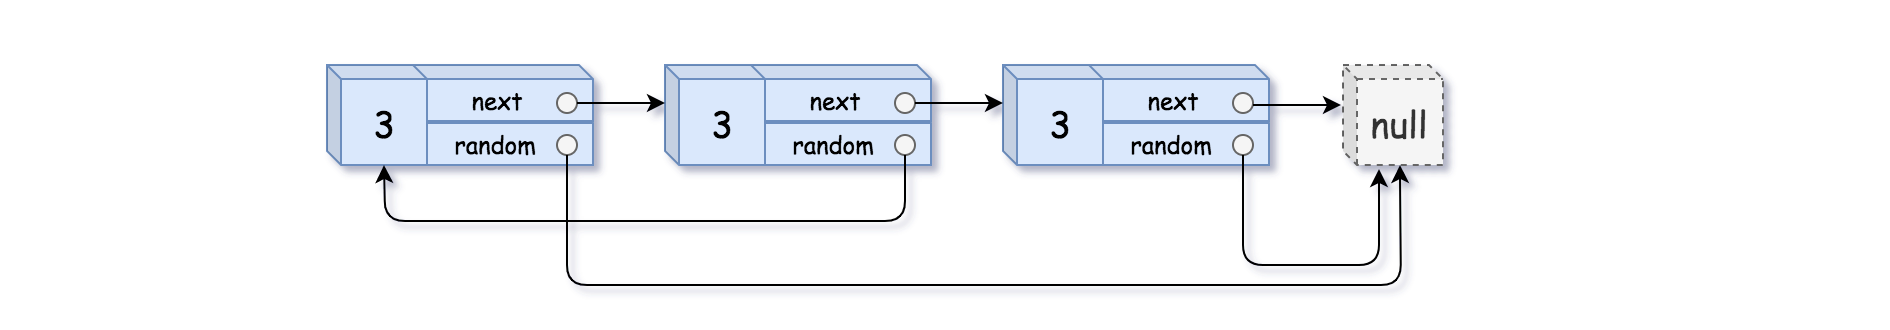

>**Input:** head = [[3,null],[3,0],[3,null]]<br>
>**Output:** [[3,null],[3,0],[3,null]]

<br>

**Constraints:**
- >0 <= n <= 1000
- >-10<sup>4</sup> <= Node.val <= 10<sup>4</sup>
- >Node.random is null or is pointing to some node in the linked list.

In [1]:
"""
# Definition for a Node.
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random
"""

class Solution:
    def copyRandomList(self, head):
        if not head:
            return None

        current = head
        while current:
            new_node = Node(current.val)
            new_node.next = current.next
            current.next = new_node
            current = new_node.next

        current = head
        while current:
            if current.random:
                current.next.random = current.random.next
            current = current.next.next

        original_head = head
        copied_head = head.next
        current = original_head
        copied_current = copied_head
        while current:
            current.next = copied_current.next
            current = current.next
            if current:
                copied_current.next = current.next
                copied_current = copied_current.next

        return copied_head